In [2]:
import numpy as np
from SuperlatticeTMM.cavities import Resonator
from SuperlatticeTMM.superlattice import Superlattice
import matplotlib.pyplot as plt
from materials import Air,GaAs,AlAs

In [100]:
wl_DBR = 900
fc = 18.73
freq_range=np.arange(18.33,19.13,0.002)
reso = Resonator([GaAs,AlAs],[wl_DBR/4./GaAs.n,wl_DBR/4./AlAs.n],900,entry=GaAs,exit=GaAs, p=(12,12), spacer=(GaAs,wl_DBR/GaAs.n))
refs = np.array(reso.calc_spectra(4780/freq_range))

In [64]:
ix = np.where(np.isclose(freq_range,18.73))[0][0]
i = 1
while True:
    if abs((refs[ix+i]-refs[ix+i-1])/refs[ix+i-1]) < 1/100:
        break
    i +=1

In [90]:
def _Lorentzian(x, amp1, wid1):
    return 1-(amp1*wid1/((x-18.729)**2+wid1**2))

In [91]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(_Lorentzian, freq_range[ix-i:ix+i+1], refs[ix-i:ix+i+1])
popt

array([0.02246853, 0.02248042])

In [92]:
np.linalg.cond(pcov)

8.304661512114599

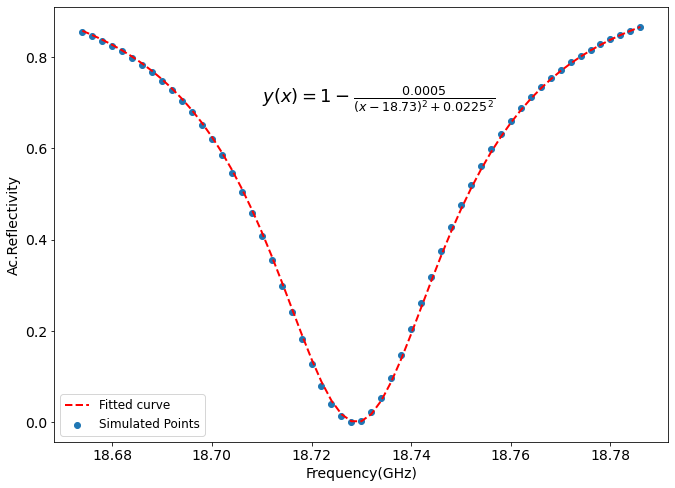

In [104]:
plt.figure(figsize=(11,8))
plt.scatter(freq_range[ix-i:ix+i+1],refs[ix-i:ix+i+1],label="Simulated Points")
plt.plot(freq_range[ix-i:ix+i+1], _Lorentzian(freq_range[ix-i:ix+i+1], *popt),'r--',label="Fitted curve",lw=2)
plt.xlabel("Frequency(GHz)",fontsize=14)
plt.ylabel("Ac.Reflectivity",fontsize=14)
plt.annotate(r"$y(x)=1- \frac{%.4f}{(x-18.73)^2+%.4f^2}$"%(popt[0]*popt[1],popt[1]),(18.71,0.7),fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [105]:
Q = 18.73/(2*popt[1])
Q

416.58483376921885